<a href="https://colab.research.google.com/github/mwahajkhan/exploratory-data-analysis/blob/main/exploratory_data_analysis_airline_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to to make strong set of features to train on.

##Feature Engineering

> Feature Transformation

    Dealing with Categorical Variables
    One Hot encoding
    Date Time Transformations

> Feature Selection

> Feature Extraction Using Principal Componenet Analysis

In [2]:
!pip install pandas numpy seaborn matplotlib scikit-learn plotly openpyxl nbformat>=4.2.0

In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Data Reading



In [6]:
path = '/content/sample_data/airlines_data.xlsx'
data = pd.read_excel(path)

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
#By using the `info` function, we will take a look at the types of data that our dataset contains.


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#The describe() function provides the statistical information about the numerical variables

data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
#Checking for null values

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#fillna() and method='ffill', which fills the last observed non-null value forward until another non-null value is encountered.

data.fillna(method='ffill')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


##**Feature Transformation**

**> Dealing with Categorical Variables**

> Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types.

In [12]:
#unique() method to obtain all the categories in a column
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

*Two fields have same names, and are sub categories, so we combine:*

> Jet Airways & Jet Airways Business

> Vistara Premium Economy & Vistara

In [13]:
#using numpy .where() function to locate to categories and combine them

data['Airline'] = np.where(data['Airline'] == 'Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business', 'Jet Airways', data['Airline'])


In [14]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Multiple carriers Premium economy',
 'Trujet']

##EX: use np.where() function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories

In [15]:
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

In [16]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Trujet']

**Converting categorical variables to numerical variables**

In [18]:
#One hot encoding using get_dummies() method

data1 = pd.get_dummies(data=data, columns = ['Airline', 'Source', 'Destination'])


In [19]:
data1.head().T

,0,1,2,3,4
Date_of_Journey,24/03/2019,1/05/2019,9/06/2019,12/05/2019,01/03/2019
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,22:20,05:50,09:25,18:05,16:50
Arrival_Time,01:10 22 Mar,13:15,04:25 10 Jun,23:30,21:35
Duration,2h 50m,7h 25m,19h,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302
Airline_Air Asia,False,False,False,False,False
Airline_Air India,False,True,False,False,False


By one-hot-encoding using get_dummies, our data frame went from 11 original features in our dataset to 38 in data1 df. This is because Pandas get_dummies() approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.

In [20]:
print(data1.shape)
print(data.shape)

(10683, 28)
(10683, 11)


# EX: using `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.

In [21]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

**Converting 'Total_Stops' categorical variables to numerical variables using label enconding**

In [22]:
data1.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [82]:
data1.head().T

,0,1,2,3,4
Date_of_Journey,24/03/2019,1/05/2019,9/06/2019,12/05/2019,01/03/2019
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,22:20,05:50,09:25,18:05,16:50
Arrival_Time,01:10 22 Mar,13:15,04:25 10 Jun,23:30,21:35
Duration,2h 50m,7h 25m,19h,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302
Airline_Air Asia,False,False,False,False,False
Airline_Air India,False,True,False,False,False


**Duration Transformation**

> Transforming date from string form, to numerical type

In [23]:
duration = list(data1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))


data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']

In [84]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285


**Transforming 'Departure' & 'Arrival" time columns**

> The to_datetime() function can transform the date and time to correct

> Split the two columns in seperate columns for corresponding hours and minutes

In [28]:
data1['Dep_Hour'] = pd.to_datetime(data1['Dep_Time']).dt.hour
data1['Dep_Min'] = pd.to_datetime(data1['Dep_Time']).dt.minute
data1.head()

<ipython-input-28-c4cf1f8b8ca0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Dep_Hour'] = pd.to_datetime(data1['Dep_Time']).dt.hour
<ipython-input-28-c4cf1f8b8ca0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Dep_Min'] = pd.to_datetime(data1['Dep_Time']).dt.minute


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Month,Year,Day,day_of_week,Dep_Hour,Dep_Min
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,True,120,50,170,3,2019,24,Sunday,22,20
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,False,420,25,445,5,2019,1,Wednesday,5,50
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,False,1140,0,1140,6,2019,9,Sunday,9,25
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,False,300,25,325,5,2019,12,Sunday,18,5
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,True,240,45,285,3,2019,1,Friday,16,50


In [29]:
data1['Arrival_hour'] = pd.to_datetime(data1['Arrival_Time']).dt.hour
data1['Arrival_min'] = pd.to_datetime(data1['Arrival_Time']).dt.minute

<ipython-input-29-360a28be5cd6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Arrival_hour'] = pd.to_datetime(data1['Arrival_Time']).dt.hour
<ipython-input-29-360a28be5cd6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Arrival_min'] = pd.to_datetime(data1['Arrival_Time']).dt.minute


In [30]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_minutes,Duration_Total_mins,Month,Year,Day,day_of_week,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,50,170,3,2019,24,Sunday,22,20,1,10
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,25,445,5,2019,1,Wednesday,5,50,13,15
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,0,1140,6,2019,9,Sunday,9,25,4,25
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,25,325,5,2019,12,Sunday,18,5,23,30
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,45,285,3,2019,1,Friday,16,50,21,35


**Splitting departure/arrival time into Time Zones**

In [31]:
data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=["Night","Morning","Afternoon","Evening"])
data1['dep_timezone']

0          Evening
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
10678      Evening
10679      Evening
10680      Morning
10681      Morning
10682      Morning
Name: dep_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

**Transforming the "Date_of_Journey" Column**

> Some info in this column is of object type, converting to correct date and time format for machine learning.

In [32]:
data1['Month'] = pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month
data1['Year'] = pd.to_datetime(data1['Date_of_Journey'], format="%d/%m/%Y").dt.year
data1['Day'] = pd.to_datetime(data1['Date_of_Journey'], format="%d/%m/%Y").dt.day
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()
data1.head()

<ipython-input-32-1ab559cd78e1>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_Total_mins,Month,Year,Day,day_of_week,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,dep_timezone
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,170,3,2019,24,Sunday,22,20,1,10,Evening
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,445,5,2019,1,Wednesday,5,50,13,15,Night
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,1140,6,2019,9,Sunday,9,25,4,25,Morning
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,325,5,2019,12,Sunday,18,5,23,30,Afternoon
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,285,3,2019,1,Friday,16,50,21,35,Afternoon


##**Feature Selection**

> Specifying attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. Methods include: Heat maps, correlation coefficent scores.

> Excluding unrelevant tables i.e. 'Route', 'Additional Info', all 'Original Categorical columns"

> Creating new dataframe with relevant and newly transformed variables

In [33]:
data1.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Month',
       'Year', 'Day', 'day_of_week', 'Dep_Hour', 'Dep_Min', 'Arrival_hour',
       'Arrival_min', 'dep_timezone'],
      dtype='object')

In [34]:
new_data = data1.loc[:, ['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

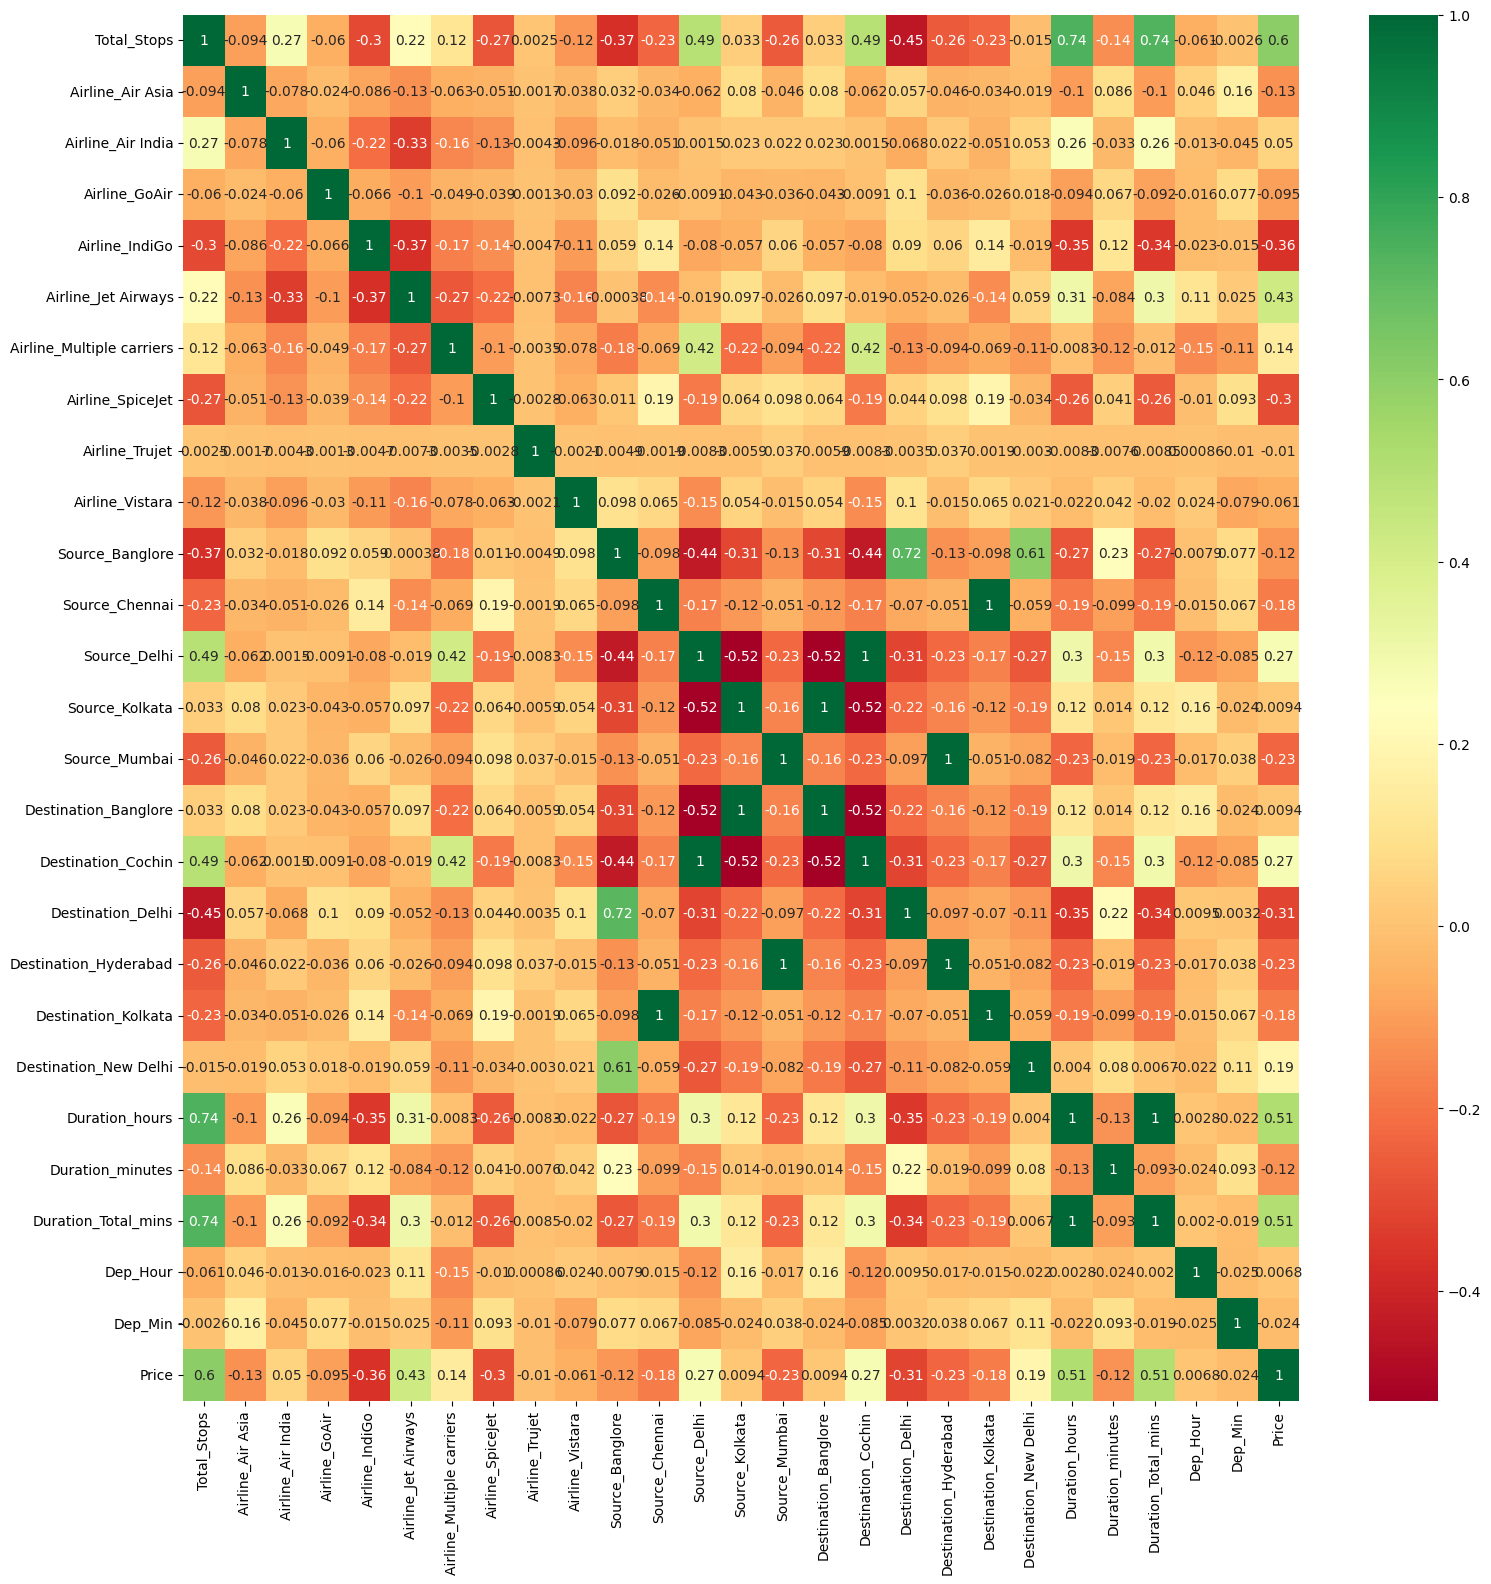

In [35]:
#Construct heatmap using seaborn library with newly formed data
plt.figure(figsize=(18, 18))
sns.heatmap(new_data.corr(), annot=True, cmap='RdYlGn')

plt.show()

> the corr() function to calculate and list the correlation between all independent variables and the 'price'.

In [36]:
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Destination_Hyderabad       -0.230745
Source_Mumbai               -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Airline_Air Asia            -0.133044
Duration_minutes            -0.124874
Source_Banglore             -0.118026
Airline_GoAir               -0.095146
Airline_Vistara             -0.060503
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Destination_Banglore         0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Destination_Cochin           0.270619
Source_Delhi                 0.270619
Airline_Jet Airways          0.428490
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603897
Price       

<Axes: >

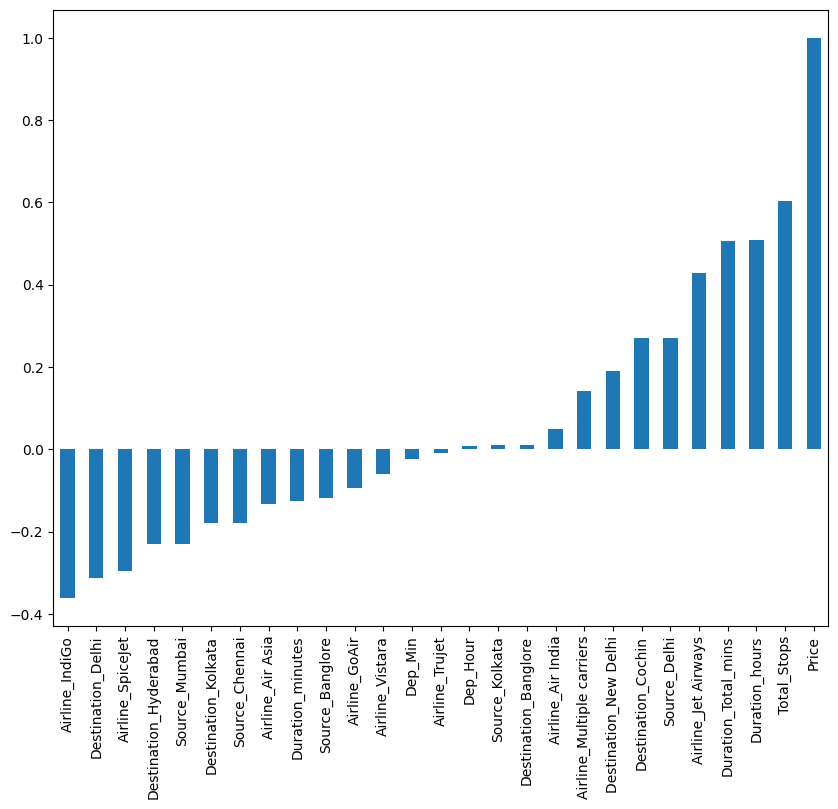

In [37]:
features.plot(kind='bar',figsize=(10,8))

*> From the above graph we can deduce the highly correlated features, and use only them for the analysis further

##**Feature Analysis Using Principal Component Analysis PCA**

> PCA With Sickit-Learn

> Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones.

> The goal of dimensionality reduction is to simplify the data without loosing too much information.

>  Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms.

In [45]:
missing_values = data1.isnull().sum()

# Print the number of missing values in each column. before performing PCA
print(missing_values)

Date_of_Journey               0
Route                         1
Dep_Time                      0
Arrival_Time                  0
Duration                      0
Total_Stops                   1
Additional_Info               0
Price                         0
Airline_Air Asia              0
Airline_Air India             0
Airline_GoAir                 0
Airline_IndiGo                0
Airline_Jet Airways           0
Airline_Multiple carriers     0
Airline_SpiceJet              0
Airline_Trujet                0
Airline_Vistara               0
Source_Banglore               0
Source_Chennai                0
Source_Delhi                  0
Source_Kolkata                0
Source_Mumbai                 0
Destination_Banglore          0
Destination_Cochin            0
Destination_Delhi             0
Destination_Hyderabad         0
Destination_Kolkata           0
Destination_New Delhi         0
Duration_hours                0
Duration_minutes              0
Duration_Total_mins           0
Month   

In [46]:
data1.dropna(inplace=True)

In [47]:
#Assign independent variables to x, assign all dependent variables i.e. 'price' to y.

x = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]


In [39]:
y = data1.Price

In [49]:
#Scale our data using the StandardScaler() function
scaler = StandardScaler()
x = scaler.fit_transform(x.astype(np.float64))

In [50]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-2.87599191, -0.55501189],
       [ 0.30953504,  2.38591887],
       [ 3.05421139, -0.51748966],
       ...,
       [-2.25142732, -0.59150682],
       [-2.70016666, -0.29010343],
       [ 1.9272523 , -1.09920487]])

*After data is scaled, applying the `fit_transform()` function to reduce the dimensionality of the dataset down to two dimensions.*

> ## **Explained Variance Ratio**

Explained variance ratio of each principal component, available via the explained_variance_ratio_ function. The ratio indicates the proportion of the dataset's variance that lies along each principal component

The first component constitutes 17.54% of the variance and second component constitutes 12.11% of the variance between the features.


In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.17512315, 0.12118177])